# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [369]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [370]:
def diagonales(n, d, C):
    mean0 = np.full(d, -1)
    mean1 = np.full(d, 1)

    desv = C * math.sqrt(d)
    covarianza = np.diag(np.full(d, desv))

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
    input1 = np.random.multivariate_normal(mean1, covarianza, (n-n//2))

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

diagonales(10, 2, 2.0)

,input,output
0,"[-1.6276096408481506, -1.8346496504441145]",0
1,"[-2.537197963269484, 0.6547654952019508]",0
2,"[0.3157064746074414, 0.4222845414073746]",0
3,"[0.5465727939764076, -2.0868190151584516]",0
4,"[-0.5607504626736182, -2.797089550617328]",0
5,"[-0.3247494397596733, 1.7604598528245843]",1
6,"[2.2055472827117435, 0.9317018642817825]",1
7,"[-0.7136275760664803, -0.9550773105523072]",1
8,"[-3.958729309461689, 1.7697529046846183]",1
9,"[3.2255379377443085, -2.2250275078647515]",1


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

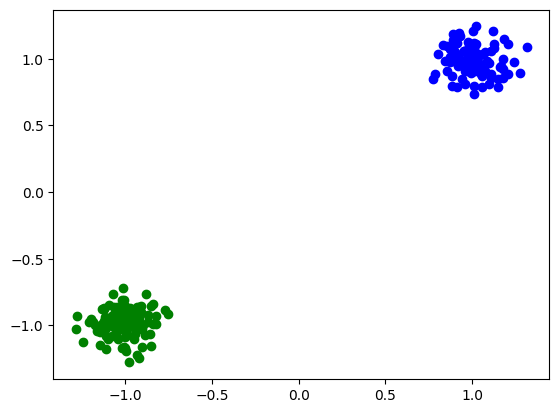

In [371]:
diag_df = diagonales(200, 2, 0.01)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["g","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [372]:
def paralelas(n, d, C):
    mean0 = np.zeros(d)
    mean1 = np.zeros(d)
    mean0[0] = 1
    mean1[0] = -1

    desv = C 
    covarianza = np.diag(np.full(d, desv ** 2))

    input0 = np.random.multivariate_normal(mean0, covarianza, n//2)
    input1 = np.random.multivariate_normal(mean1, covarianza, (n-n//2))

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

paralelas(10, 2, 0.75)


,input,output
0,"[0.2991021742468901, -1.1531935194332465]",0
1,"[2.4868148581235765, 0.026121625472676005]",0
2,"[1.397048451847243, -0.7790088175989216]",0
3,"[0.29597053766221704, 0.12847558347549243]",0
4,"[0.5062060812437066, 0.8079484855495532]",0
5,"[0.3577185847176103, -0.27697010667958605]",1
6,"[-1.1995006214924866, -1.1337670734057022]",1
7,"[-0.9613970174774061, -0.039647600434132055]",1
8,"[-1.1963107984290184, 0.5297929539997515]",1
9,"[-1.309349054496156, 0.3904694321535559]",1


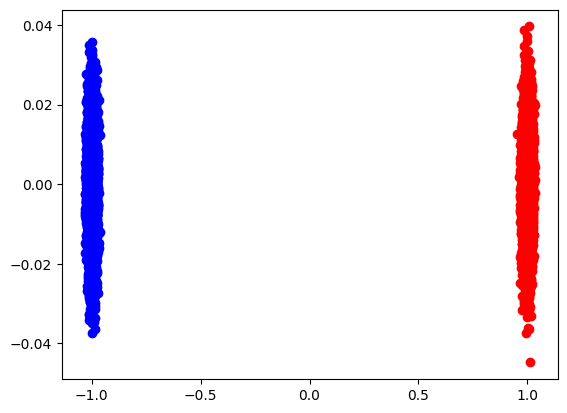

In [373]:
diag_df = paralelas(20000, 2, 0.01)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["r","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [374]:
def checkFactor(r, theta, factor):
    x = (theta + factor*2*np.pi)
    return (r*4 - 1)*np.pi < x and x < r*4*np.pi

def generaPunto(radius=1):
    # Generar un ángulo aleatorio entre 0 y 2π
    theta = np.random.uniform(0, 2 * np.pi)
    
    # Generar un radio aleatorio con una distribución uniforme en el área del círculo
    r = radius * np.sqrt(np.random.uniform(0, 1))

    bool = True
    # Convertir coordenadas polares (r, theta) a coordenadas cartesianas (x, y)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    if checkFactor(r, theta,1) or checkFactor(r,theta,0) or checkFactor(r, theta, -1):
        return (True, np.array([x, y]))
    else:
        return (False, np.array([x,y]))

def generaInEspiral(k, bool):
    puntos = []
    contador = k
    while contador != 0:
        punto = generaPunto()
        if bool == punto[0]:
            puntos.append(punto[1])
            contador -= 1
    return np.array(puntos)

def espirales(n):
    input0 = generaInEspiral(n//2, True)
    input1 = generaInEspiral(n-n//2, False)

    output0 = np.full(n//2, 0)
    output1 = np.full(n-n//2, 1)

    inputs = np.concatenate([input0, input1])
    outputs = np.concatenate([output0, output1])
    
    return pd.DataFrame({"input" : inputs.tolist(), "output" : outputs})

espirales(50)

,input,output
0,"[0.38752490818135726, -0.4694664390311828]",0
1,"[-0.8403104474148144, -0.2153351532892551]",0
2,"[-0.9821481149162821, 0.029259226173003073]",0
3,"[-0.35513417996951385, 0.7810285540685514]",0
4,"[-0.30208750748421787, 0.2792618725151256]",0
5,"[0.1253497171688049, 0.2581133893048966]",0
6,"[0.04909945814888553, -0.014680790306370197]",0
7,"[0.4955412496578909, -0.8156949864384233]",0
8,"[0.598482056738528, -0.23457474212567508]",0
9,"[-0.9059579684853647, 0.146362967166187]",0


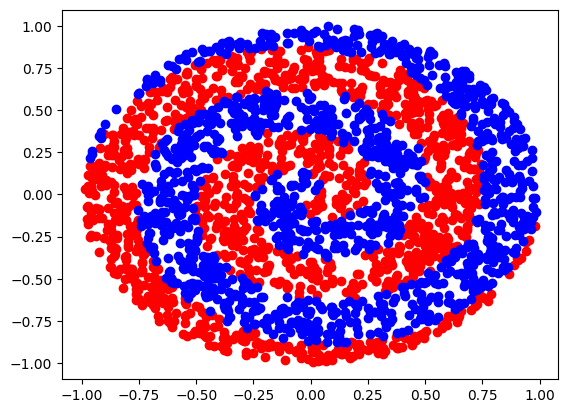

In [375]:
diag_df = espirales(2500)

# diferenciar entre clase 0 y clase 1
c0 = diag_df[diag_df['output'] == 0]
c1 = diag_df[diag_df['output'] == 1]

xs0 = [e[0] for e in c0['input']]
ys0 = [e[1] for e in c0['input']]
xs1 = [e[0] for e in c1['input']]
ys1 = [e[1] for e in c1['input']]

import itertools

colors = itertools.cycle(["r","b","a"]);
plt.scatter(xs0, ys0, color=next(colors))
plt.scatter(xs1, ys1, color='blue')
plt.show()

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.55\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'x[3] <= 1.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'entropy = 0.503\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

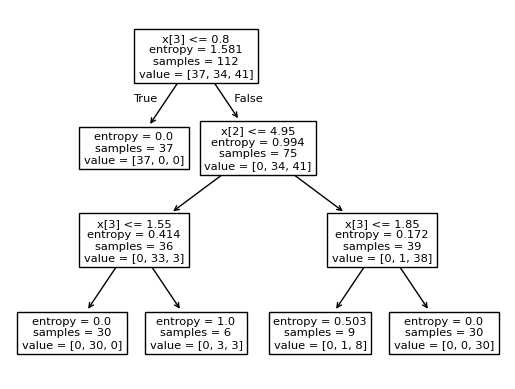

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
tree.plot_tree(clf)

## Ejercicio 1
Genere tres conjuntos de datos de entrenamiento correspondientes al problema de las espirales anidadas de la práctica 0, uno de longitud 150, otro de 600 y un tercero de 3000. Genere un conjunto de test de longitud 10000. A partir de cada uno de los conjuntos de entrenamiento, entrene el árbol de decisión correspondiente y grafique las predicciones sobre el conjunto de test. Comente los resultados.

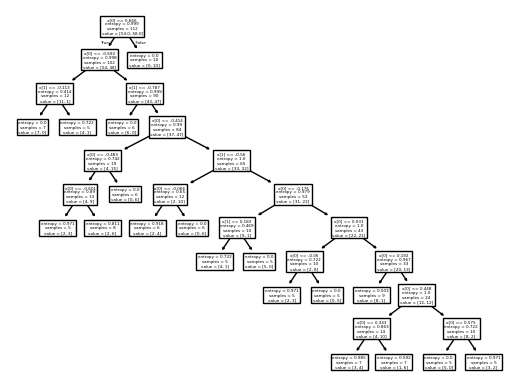

In [377]:
def toTreeClassifier(s):
    Xinput = np.array(s['input'].tolist())
    youtput = np.array(s['output'])
    Xinput_train, Xinput_test, youtput_train, youtput_test = train_test_split(Xinput, youtput, random_state=0)
    clf1 = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf1.fit(Xinput_train, youtput_train)
    plot_tree(clf1)
    return (Xinput_train, youtput_train), clf1

sets =[espirales(i) for i in [150,600,3000]]
_,tree150 = toTreeClassifier(sets[0])

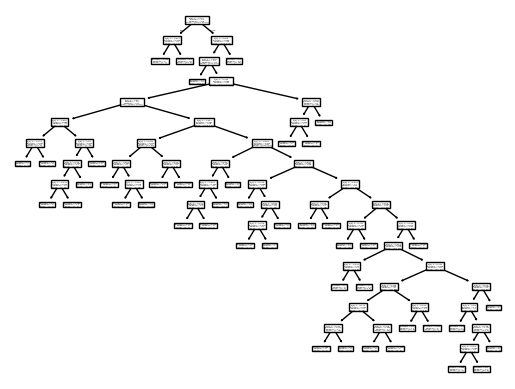

In [378]:
_, tree600 = toTreeClassifier(sets[1])

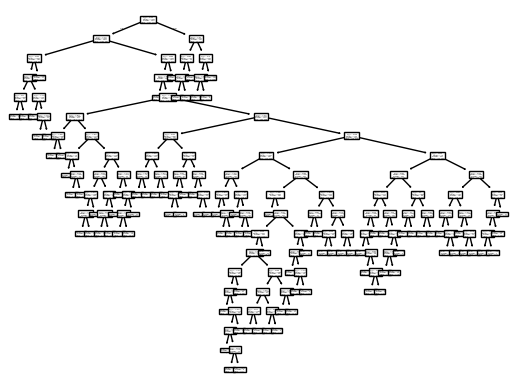

In [379]:
_, tree3000 = toTreeClassifier(sets[2])

In [380]:
def printData(diag_df):
    # diferenciar entre clase 0 y clase 1
    c0 = diag_df[diag_df['output'] == 0]
    c1 = diag_df[diag_df['output'] == 1]

    xs0 = [e[0] for e in c0['input']]
    ys0 = [e[1] for e in c0['input']]
    xs1 = [e[0] for e in c1['input']]
    ys1 = [e[1] for e in c1['input']]

    plt.scatter(xs0, ys0, color='yellow')
    plt.scatter(xs1, ys1, color='blue')
    plt.show()


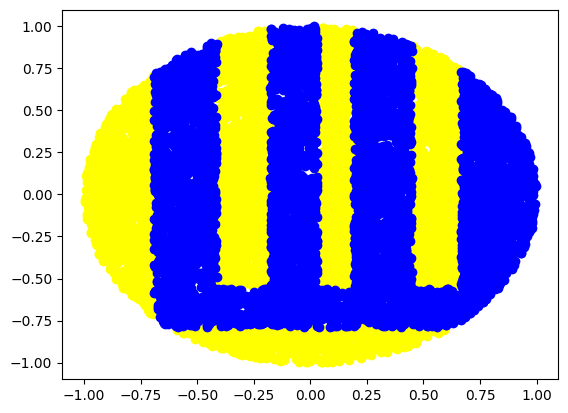

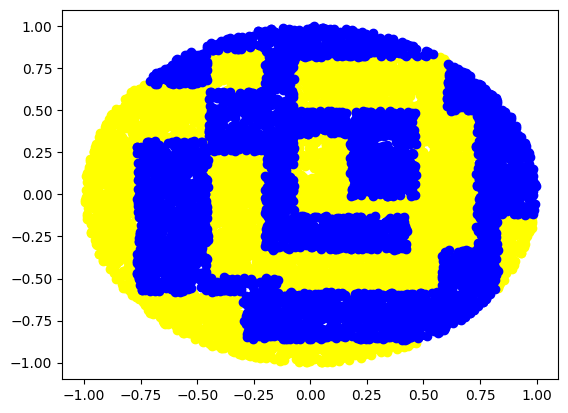

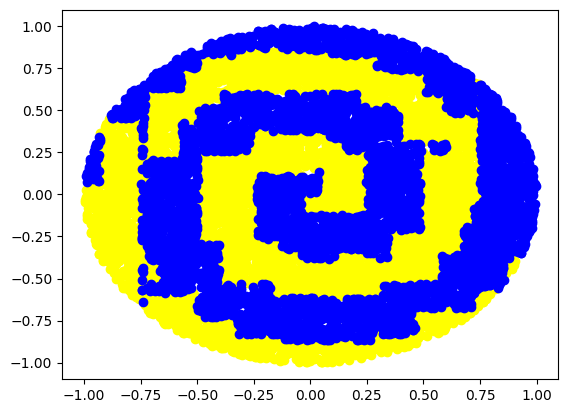

In [381]:
def comparationDataFrame(test, tree):
    predictTree = tree.predict(test)
    newDataFrame = pd.DataFrame({"input": test.tolist(), "output" : predictTree})
    return newDataFrame

test10000 = espirales(10000)
#esta linea ya no hace falta
#testTopredict = np.array(test10000['input'].tolist())
plotTest150 = comparationDataFrame(testTopredict, tree150)
printData(plotTest150)

plotTest600 = comparationDataFrame(testTopredict, tree600)
printData(plotTest600)

plotTest3000 = comparationDataFrame(testTopredict, tree3000)
printData(plotTest3000)

## Ejercicio 2
Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste:

Genere datasets usando el código "diagonal" desarrollado en la práctica de python (el otro conjunto desarrollado se llama "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar.
También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos.

Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

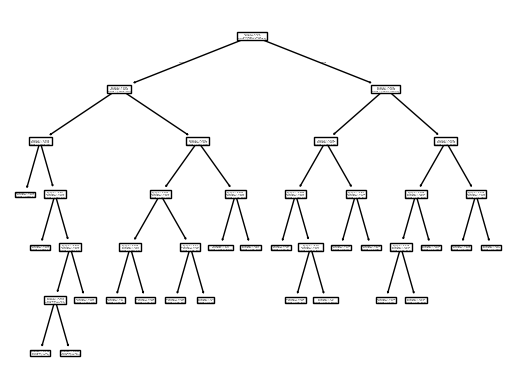

In [392]:
test = diagonales(10000, 2, 0.78)
(Xtest, ytest),treeTest = toTreeClassifier(test)
nDF = dict()
nDFError = dict()

# Generación de datos
nValues = [125, 250, 500, 1000, 2000, 4000]
countSets = 20

for n in nValues:
    nDF[n] = (([],[]),[])   # (([dataframes], [data train]), trees)
    nDFError[n] = ([],[],[]) # ([training error], [test error], [count nodes]) 
    for countdf in range(countSets):
            # Make DataFrame
            diag = diagonales(n, 2, 0.78)
            (Xtrain, ytrain),tree = toTreeClassifier(diag)

            # Save DataFrame
            ((dfs,trains), trees) = nDF[n]
            dfs.append(diag)
            trains.append((Xtrain, ytrain))
            trees.append(tree)
            nDF[n] = ((dfs,trains), trees)

            # Save Errors and nodes
            (trainErrors, testErrors, countNodes) = nDFError[n]
            nodes = tree.tree_.node_count
            trainError = 1 - tree.score(Xtrain, ytrain)
            testError = 1 - tree.score(Xtest, ytest)
            trainErrors.append(trainError)
            testErrors.append(testError)
            countNodes.append(nodes)
            nDFError[n] = (trainErrors, testErrors, countNodes)

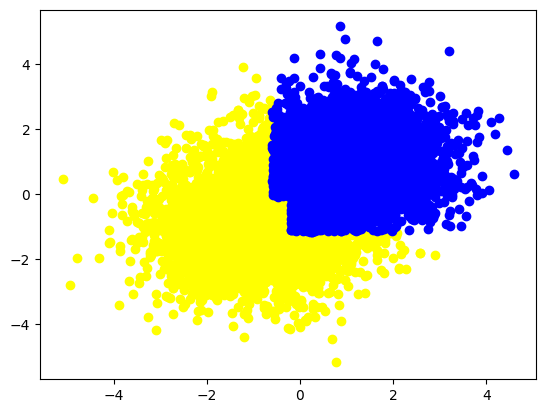

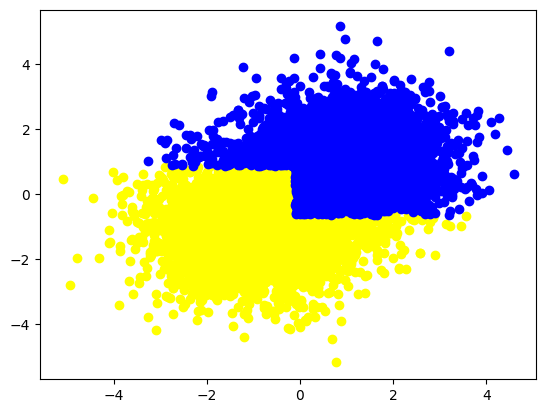

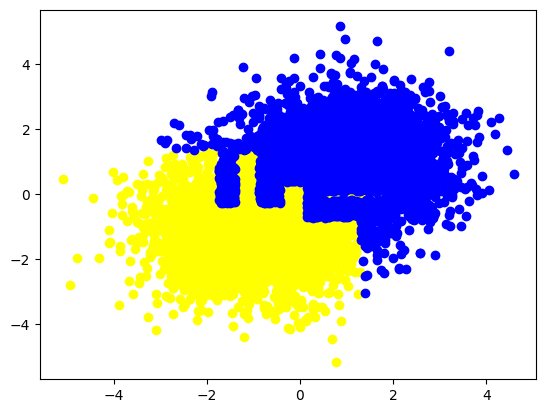

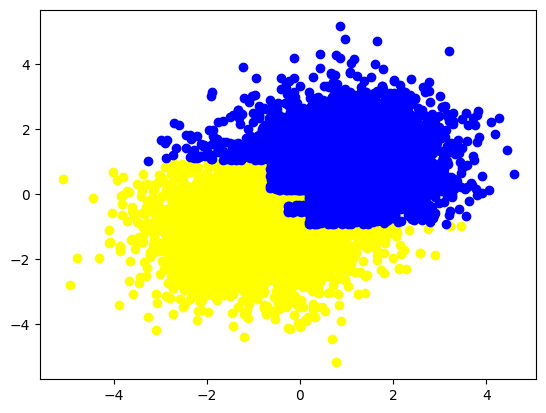

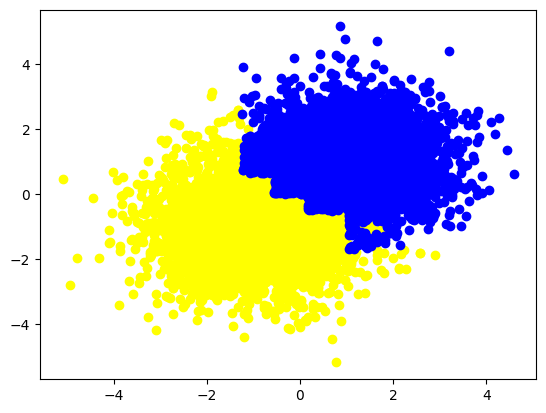

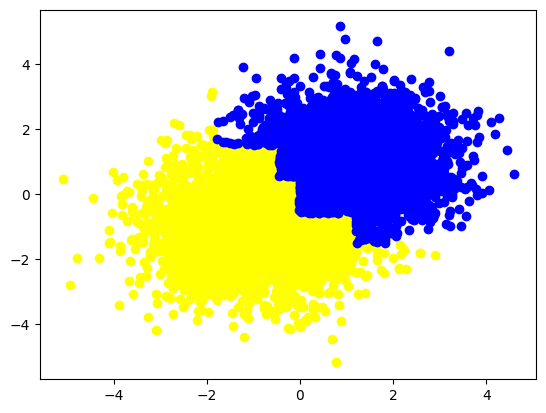

In [391]:
for n in nValues:
    (_,trees) = nDF[n]
    plotTest = comparationDataFrame(Xtest, trees[19])
    printData(plotTest)    


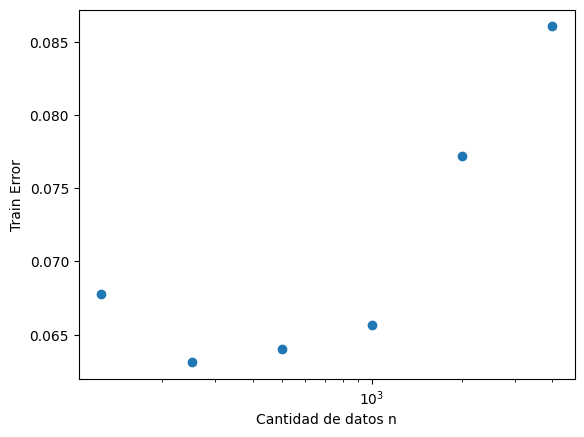

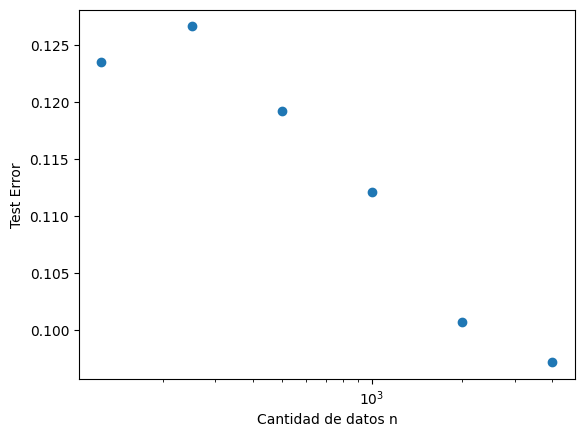

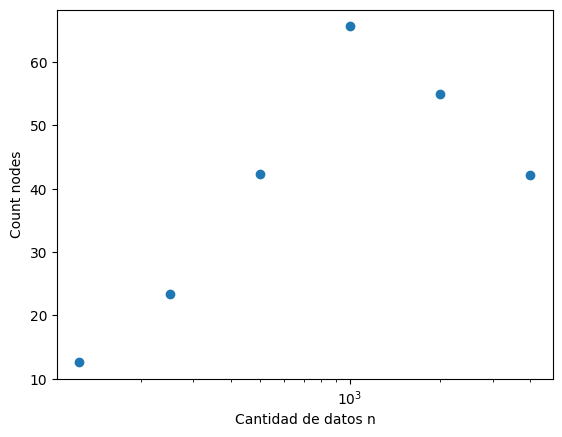

In [398]:
def printEscLog(valuesX, valuesY, labelY):
    plt.scatter(valuesX, valuesY)
    plt.xscale('log')
    plt.xlabel('Cantidad de datos n')
    plt.ylabel(labelY)    
    plt.show()

promTrainErr = []
promTestErr = []
promNodes = []
for n in nValues:
    (trainErrors, testErrors, countNodes) = nDFError[n]
    promTrainErr.append(sum(trainErrors)/countSets)
    promTestErr.append(sum(testErrors)/countSets)
    promNodes.append(sum(countNodes)/countSets)

printEscLog(nValues, promTrainErr, 'Train Error')
printEscLog(nValues, promTestErr, 'Test Error')
printEscLog(nValues, promNodes, 'Count nodes')


## Ejercicio 3
Resistencia al ruido:

Genere datasets con d = 5, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando el valor de C (overlapping de las clases) de 0.5 a 2.5 con incrementos de 0.5. Como en el punto anterior, para cada valor dado de C cree 20 conjuntos distintos de entrenamiento, pero uno solo de test. Genere una gráfica del test-error en función de C para el problema "paralelo" y el "diagonal" (sólo los promedios de los 20 conjuntos para cada valor de C). También incluya en la gráfica los valores mínimos que se piden en el opcional 3.1 (el que no haga el opcional me los puede pedir a mi). Todos los resultados de los dos problemas y el error mínimo en la misma gráfica. Discuta los resultados.

## Ejercicio 3 opcional
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cuál es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal. Para que verifiquen sus resultados, el error de Bayes para el diagonal con C=1.00 es 15.86%

In [ ]:
# Codigo 3

## Ejercicio 4
Dimensionalidad:

Genere datasets con C = 0.78, n = 250 para el conjunto de entrenamiento y n = 10000 para el de test, variando esta vez el valor de d según la siguiente lista: 2, 4, 8, 16, 32. Para cada valor de d cree 20 conjuntos distintos de entrenamiento, y uno solo de test. Genere una gráfica del train y test error en función de d para el problema "paralelo" y el "diagonal" (todos en la misma gráfica). Discuta los resultados.

In [ ]:
# Codigo 4

## Ejercicio 5
Opcional: Baje de los archivos al problema XOR. Grafique las clases. Observando el problema, indique cuál es el árbol más simple que clasifica correctamente todos los puntos. Aplique ahora un árbol con el siguiente setup DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 
sobre este problema, y explique el resultado obtenido.

In [ ]:
# Codigo 5